In [1]:
import jax.numpy as jnp
import jax.random as jrd
import matplotlib.pyplot as plt

from sealagrangiax.grid import Dataset
from sealagrangiax.simulator import LinearSSC, SmagorinskyDiffusion
from sealagrangiax.trajectory import Location
from sealagrangiax.utils import UNIT

In [12]:
nt = 7
ny = 100
nx = 50

dt = jnp.asarray(6*60*60)

ts = jnp.linspace(0, dt * (nt - 1), nt)

key = jrd.key(0)
key, key_u, key_v = jrd.split(key, 3)

u = jnp.ones((nt, ny, nx)) + jrd.normal(key_u, (nt, ny, nx)) / 100
v = jnp.ones((nt, ny, nx)) + jrd.normal(key_v, (nt, ny, nx)) / 100

sim_ts = ts[1:-1]
dt0 = jnp.asarray(30*60)
cs = jnp.asarray(0.1)
n_samples = jnp.asarray(10)

In [3]:
sim_traj = LinearSSC()
sim_ens = SmagorinskyDiffusion.from_param(cs=cs)

In [4]:
flat_latitude = jnp.linspace(0, 2e6, ny)
flat_longitude = jnp.linspace(0, 1e6, nx)

flat_ds = Dataset.from_arrays(
    variables={"u": u, "v": v},
    time=ts, latitude=flat_latitude, longitude=flat_longitude,
    is_spherical_mesh=False
)
flat_x0 = Location(jnp.asarray((flat_latitude[10], flat_longitude[10])), unit=UNIT["m"])

In [5]:
flat_traj = sim_traj(flat_ds, flat_x0, sim_ts, dt0=dt0)

In [6]:
flat_traj_ens = sim_ens(flat_ds, flat_x0, sim_ts, dt0=dt0, n_samples=n_samples)

<Axes: >

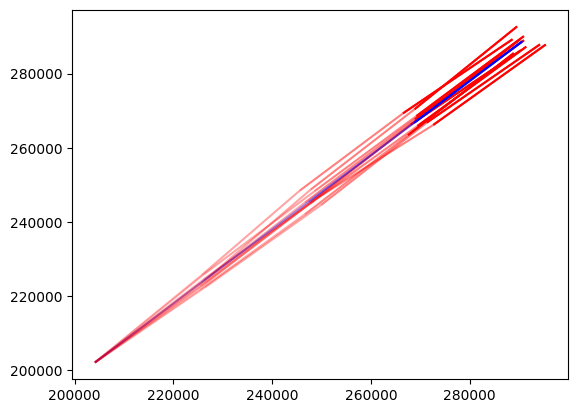

In [7]:
fig, ax = plt.subplots()

flat_traj_ens.plot(ax, label="Ensemble", color="red")
flat_traj.plot(ax, label="Trajectory", color="blue")

In [8]:
spherical_latitude = jnp.linspace(36, 38, ny)
spherical_longitude = jnp.linspace(-1, 1, nx)

spherical_ds = Dataset.from_arrays(
    variables={"u": u, "v": v},
    time=ts, latitude=spherical_latitude, longitude=spherical_longitude
)
spherical_x0 = Location(jnp.asarray((spherical_latitude[10], spherical_longitude[10])))

In [9]:
spherical_traj = sim_traj(spherical_ds, spherical_x0, sim_ts, dt0=dt0)

In [10]:
spherical_traj_ens = sim_ens(spherical_ds, spherical_x0, sim_ts, dt0=dt0, n_samples=n_samples)

<Axes: >

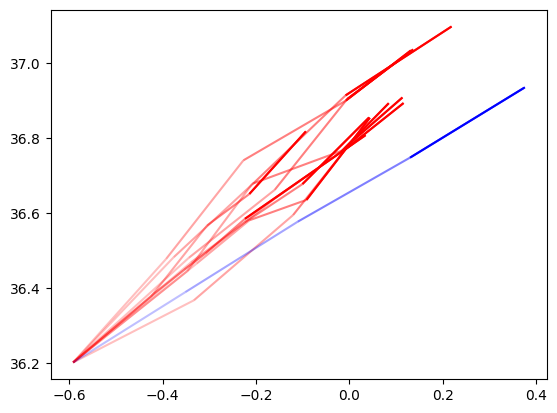

In [11]:
fig, ax = plt.subplots()

spherical_traj_ens.plot(ax, label="Ensemble", color="red")
spherical_traj.plot(ax, label="Trajectory", color="blue")